# <u>Combining UK and Ireland roads data cleaning</u>

In [1]:
# Importing Python packages and modules
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Uploading the files
#### Roads data from [Humanitarian OpenStreetMap](https://data.humdata.org/dataset/hotosm_gbr_roads)

In [2]:
# Roads GeoDataFrame (lines)

#UK roads
gb_roads = gpd.read_file("GB_roads.gpkg")
#Ireland roads
ire_roads = gpd.read_file("Ireland_roads.gpkg")

---------------------

## Great Britain roads data

In [3]:
#Checking CRS and basic info Great Britain roads:
print("CRS:", gb_roads.crs)
print("Number of features:", len(gb_roads))
display(gb_roads.head())

CRS: EPSG:4326
Number of features: 6857400


,name,name:en,highway,surface,smoothness,width,lanes,oneway,bridge,layer,source,osm_id,osm_type,geometry
0,Birchfield Road,None,residential,None,None,None,None,yes,None,None,None,28447628,ways_line,"LINESTRING (-2.96045 53.44461, -2.96065 53.444..."
1,None,None,service,None,None,None,None,None,None,None,None,909942462,ways_line,"LINESTRING (-0.71646 52.25268, -0.71619 52.25256)"
2,None,None,service,gravel,None,None,None,None,None,None,None,3875396,ways_line,"LINESTRING (0.1468 52.21474, 0.14641 52.21456)"
3,None,None,footway,None,None,None,None,None,None,None,None,1195877967,ways_line,"LINESTRING (-0.77118 51.80733, -0.77111 51.807..."
4,None,None,service,gravel,None,None,None,None,None,None,None,161672164,ways_line,"LINESTRING (-0.36237 51.37226, -0.36194 51.3721)"


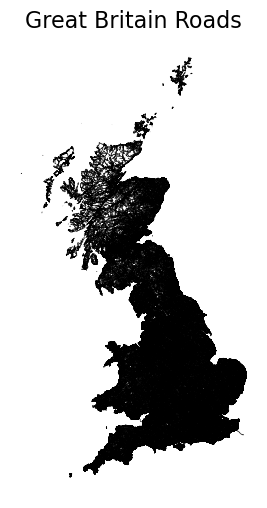

In [4]:
# Visulising the data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
gb_roads.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("Great Britain Roads", fontsize=16)
ax.set_axis_off()
plt.show()

------------------------

## Ireland roads data

In [5]:
# Checking CRS and basic info Irelands roads:
print("CRS:", ire_roads.crs)
print("Number of features:", len(ire_roads))
display(ire_roads.head())

CRS: EPSG:4326
Number of features: 1299475


,name,name:en,highway,surface,smoothness,width,lanes,oneway,bridge,layer,source,name:ga,osm_id,osm_type,geometry
0,Croke Gardens,None,residential,None,None,None,None,yes,None,None,None,None,241115500,ways_line,"LINESTRING (-7.81618 52.67734, -7.81622 52.677..."
1,None,None,service,None,None,None,None,None,None,None,None,None,556111566,ways_line,"LINESTRING (-8.5853 51.88887, -8.58523 51.8888..."
2,Cruise's Street,None,pedestrian,paving_stones,None,None,None,None,None,None,street sign,Sráid An Chrúisigh,24624573,ways_line,"LINESTRING (-8.62625 52.6642, -8.62619 52.6641..."
3,Bedford Row,None,unclassified,sett,None,None,1,yes,None,None,names: street sign,Raedh Bedford,24624579,ways_line,"LINESTRING (-8.62979 52.66416, -8.62975 52.664..."
4,None,None,track,gravel,None,None,None,None,None,None,None,None,368769947,ways_line,"LINESTRING (-9.7058 53.55292, -9.70596 53.5531..."


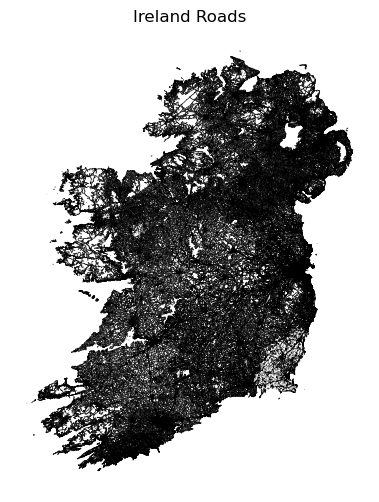

In [6]:
# Visulising the Ireland roads data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ire_roads.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("Ireland Roads")
ax.set_axis_off()
plt.show()

--------------------------------------------

## Combining the two

In [7]:
# Combine the two GeoDataFrames
roads = gpd.GeoDataFrame(
    pd.concat([gb_roads, ire_roads], ignore_index=True),
    crs=gb_roads.crs)

# Quick check UK roads: 6857400, Ireland roads: 1299475 = 8156875
print("Number of combined roads:", len(roads))
roads.head()

Number of combined roads: 8156875


,name,name:en,highway,surface,smoothness,width,lanes,oneway,bridge,layer,source,osm_id,osm_type,geometry,name:ga
0,Birchfield Road,None,residential,None,None,None,None,yes,None,None,None,28447628,ways_line,"LINESTRING (-2.96045 53.44461, -2.96065 53.444...",NaN
1,None,None,service,None,None,None,None,None,None,None,None,909942462,ways_line,"LINESTRING (-0.71646 52.25268, -0.71619 52.25256)",NaN
2,None,None,service,gravel,None,None,None,None,None,None,None,3875396,ways_line,"LINESTRING (0.1468 52.21474, 0.14641 52.21456)",NaN
3,None,None,footway,None,None,None,None,None,None,None,None,1195877967,ways_line,"LINESTRING (-0.77118 51.80733, -0.77111 51.807...",NaN
4,None,None,service,gravel,None,None,None,None,None,None,None,161672164,ways_line,"LINESTRING (-0.36237 51.37226, -0.36194 51.3721)",NaN


In [9]:
os.makedirs("Data_cleaning_images", exist_ok=True)

# Saving 10 rows of the table for write up
n = 10
roads.head(n).to_html(
    "Data_cleaning_images/Roads_Cleaning_Roads_Table.html",
    index=False)

In [10]:
# Saving as a geopackage into the main folder for use with the main notebooks
roads.to_file("../merged_roads.gpkg", layer="roads", driver="GPKG")

----------------------------------------------------------

## Exploring the data

In [11]:
roads.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8156875 entries, 0 to 8156874
Data columns (total 15 columns):
 #   Column      Dtype   
---  ------      -----   
 0   name        object  
 1   name:en     object  
 2   highway     object  
 3   surface     object  
 4   smoothness  object  
 5   width       object  
 6   lanes       object  
 7   oneway      object  
 8   bridge      object  
 9   layer       object  
 10  source      object  
 11  osm_id      int64   
 12  osm_type    object  
 13  geometry    geometry
 14  name:ga     object  
dtypes: geometry(1), int64(1), object(13)
memory usage: 933.5+ MB


#### Visulising the combined data

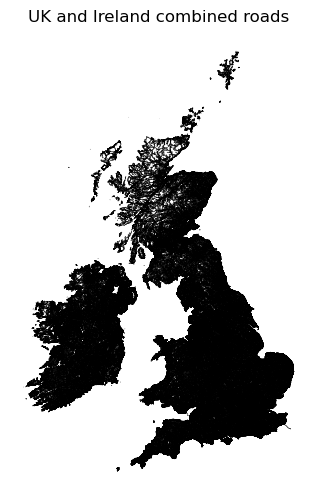

In [12]:
# Visualising the data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
roads.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.5)
ax.set_title("UK and Ireland combined roads")
ax.set_axis_off()

# Saving to 'Images' folder for use in write-up and displaying
plt.savefig("Data_cleaning_images/Roads_Cleaning_UK_Ireland_Roads.png", dpi=150, bbox_inches="tight")
plt.show()

#### Road types

In [13]:
# Lising the unique types of road
print(roads['highway'].unique())

['residential' 'service' 'footway' 'unclassified' 'secondary' 'tertiary'
 'construction' 'path' 'cycleway' 'track' 'primary' 'trunk' 'steps'
 'pedestrian' 'bridleway' 'trunk_link' 'primary_link' 'motorway' 'no'
 'living_street' 'tertiary_link' 'corridor' 'elevator' 'proposed'
 'motorway_link' 'secondary_link' 'road' 'busway' 'platform' 'raceway'
 'emergency_bay' 'razed' 'bus_guideway' 'escape' 'disused' 'crossing'
 'unclassified_link' 'planned' 'rest_area' 'ladder' 'abandoned' 'sidewalk'
 'bus_stop' 'scramble' 'roman_road' 'street_lamp' 'services']


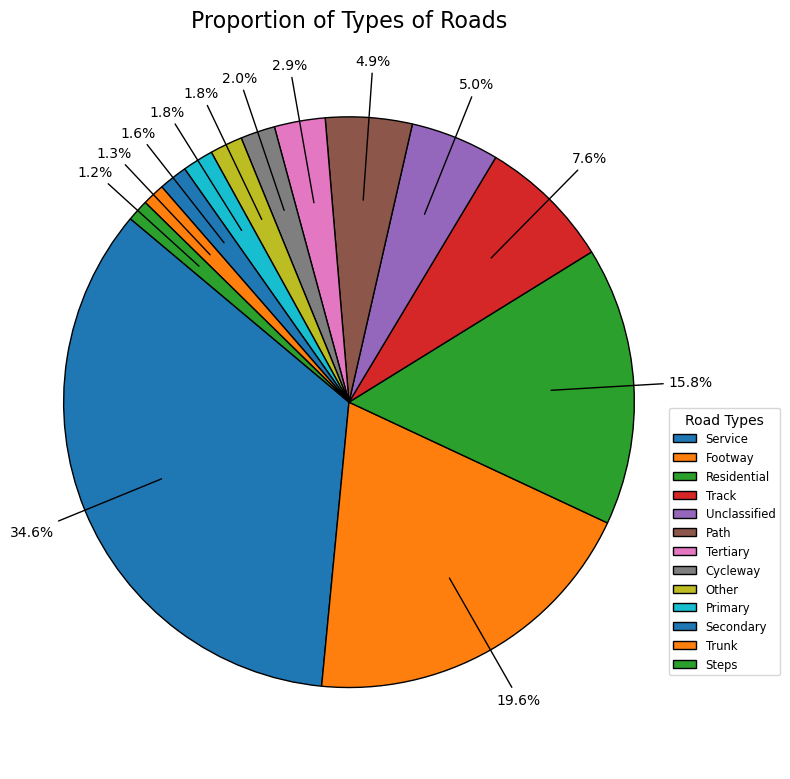

In [14]:
# Counting the different types of roads, keeping any null values
type_counts = roads['highway'].value_counts(dropna=False)

# Computing the percentages
type_percent = type_counts / type_counts.sum() * 100

# Grouping small categories into "Other" category to keep it clean
threshold = 1  
type_counts_grouped = type_counts.copy()
type_counts_grouped[type_percent < threshold] = 0
other_count = type_counts[type_percent < threshold].sum()

# Final grouped data
type_counts_grouped = type_counts_grouped[type_counts_grouped > 0]
type_counts_grouped["Other"] = other_count
type_counts_grouped = type_counts_grouped.sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    type_counts_grouped,
    labels=None,
    startangle=140,
    wedgeprops={'edgecolor': 'black'})

# Add percentage labels on stalks for slices > threshold
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2.
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    
    percentage = type_counts_grouped.iloc[i] / type_counts_grouped.sum() * 100
    if percentage > threshold:
        plt.annotate(
            f"{percentage:.1f}%",
            xy=(x * 0.7, y * 0.7),      # Start of stalk
            xytext=(x * 1.2, y * 1.2),  # End of stalk
            ha='center', va='center',
            arrowprops=dict(arrowstyle='-', lw=1),
            fontsize=10)

# Capitalising legend labels
capitalized_labels = [str(label).capitalize() for label in type_counts_grouped.index]

# Adding legend
plt.legend(
    wedges,
    capitalized_labels,
    title='Road Types',
    bbox_to_anchor=(1, 0.5),
    loc='upper left',
    fontsize='small')

# Displaying, saving and formatting pie chart
plt.title('Proportion of Types of Roads', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig("Data_cleaning_images/Roads_Cleaning_Roads_Types_Piechart.png", dpi=150, bbox_inches="tight")
plt.show()
